# Check Datasets

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kaooi
from dask.distributed import Client
import fsspec
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 32,Total memory: 62.79 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43069,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.79 GiB
Comm: tcp://127.0.0.1:41519,Total threads: 4
Dashboard: http://127.0.0.1:41917/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:45511,


In [3]:
ds = kaooi.open_ooi_bb(compute=True, verbose=True)

mapping dataset to /datadrive/kauai/transmissions/ooi_bb_tc/


  1%|          | 17/1995 [00:00<00:11, 166.83it/s]

100%|██████████| 1995/1995 [00:10<00:00, 198.76it/s]


## Search and destory broken files

- it seems like there aren't any broken files. But, I think kerchunk mapping is still broken for LJ01A

In [4]:
for k in tqdm(range(ds.sizes['transmission'])):
    ds['LJ01D'].isel({'transmission': k}).compute()

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 399/399 [00:56<00:00,  7.07it/s]


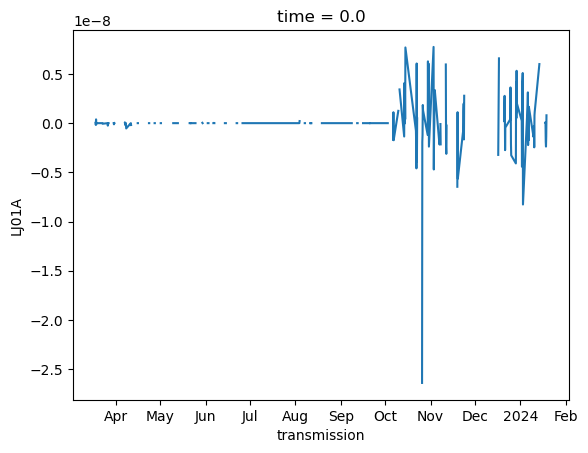

In [7]:
ds['LJ01A'][0,:].plot()

In [10]:
fs = fsspec.filesystem('')
fns = fs.glob('/datadrive/kauai/transmissions/ooi_bb_tc/LJ01D/*.nc')

In [11]:
for fn in tqdm(fns):
    ds = xr.open_dataset(fn)
    if ds.sizes['time'] != 3600001:
        print(fn)

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 399/399 [00:56<00:00,  7.03it/s]


In [24]:
ds = xr.open_dataset(fns[399])

IndexError: list index out of range

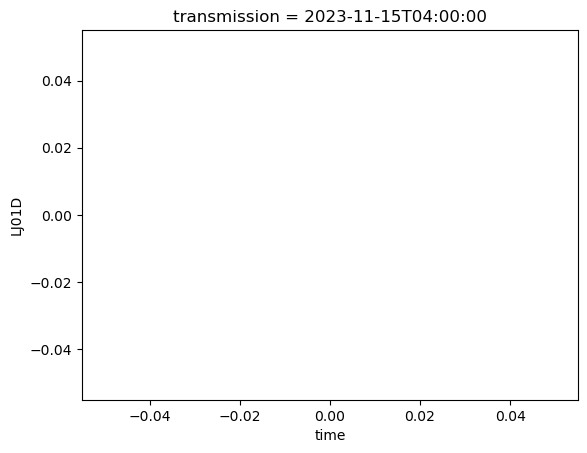

In [25]:
ds['LJ01D'].plot()

## Does the signal show up ? 

In [8]:
ds_proc = kaooi.process_data(ds)

In [18]:
ds_stack = np.abs(ds_proc.sel({'longtime':slice(50*60, 60*60)}).mean('longtime'))

In [43]:
LJ01D_nanmask = np.isnan(ds['LJ01A'][0,:]).compute()

In [44]:
LJ01D_nanmask[250]

<xarray.DataArray 'LJ01A' ()>
array(False)
Coordinates:
    time          float64 0.0
    transmission  datetime64[ns] 2023-10-06T20:00:00
Attributes: (12/13)
    _format:        MSEED
    calib:          1.0
    channel:        YDH
    delta:          0.002
    endtime:        2023-03-18T02:00:00.000000Z
    location:       LJ01A
    ...             ...
    network:        OO
    npts:           3600001
    processing:     ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2023, 3, 18, 2, 0...
    sampling_rate:  500.0
    starttime:      2023-03-18T00:00:00.000000Z
    station:        HYVM1

In [45]:
LJ01D_nonan = ds_stack['LJ01A'][~LJ01D_nanmask].compute()

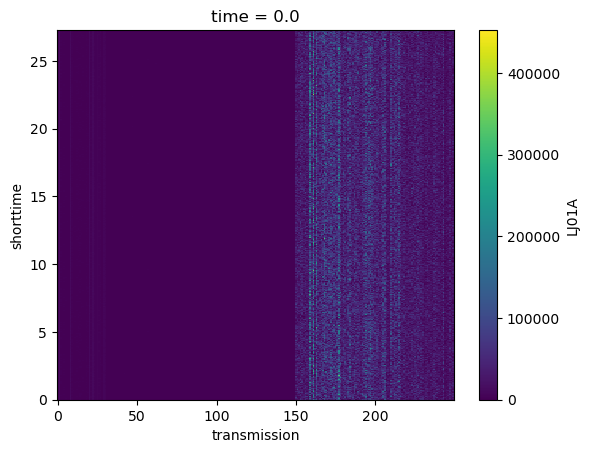

In [46]:
LJ01D_nonan.drop_vars('transmission').plot(x='transmission', rasterized=True)

## Low frequency dataset

In [83]:
ds = kaooi.open_ooi_lf(dataset_dir = '/datadrive/kauai/transmissions/ooi_lf/', compute=True, verbose=True)

mapping dataset to /datadrive/kauai/transmissions/ooi_lf/


  0%|          | 0/410 [00:00<?, ?it/s]

100%|██████████| 410/410 [00:07<00:00, 53.09it/s]


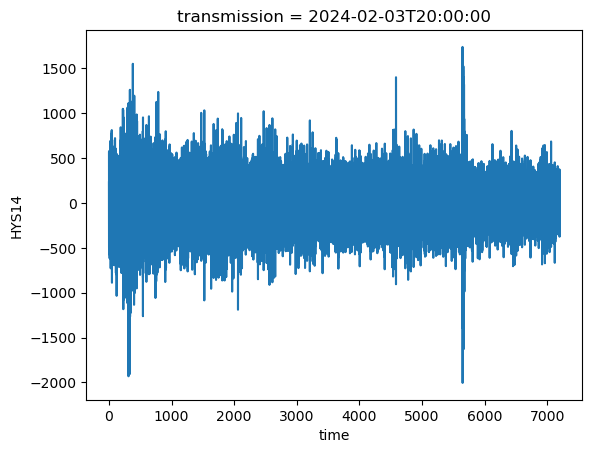

In [94]:
ds['HYS14'][:,-1].plot()

In [52]:
fs = fsspec.filesystem('')
fns = fs.glob('/datadrive/kauai/transmissions/ooi_lf_tc/*.nc')

In [56]:
for fn in tqdm(fns):
    ds = xr.open_dataset(fn)
    if ds.sizes['time'] != 1434928:
        print(fn)

 10%|█         | 35/342 [00:00<00:04, 65.34it/s]

100%|██████████| 342/342 [00:04<00:00, 75.51it/s]


In [71]:
ds = xr.open_dataset(fns[-1])

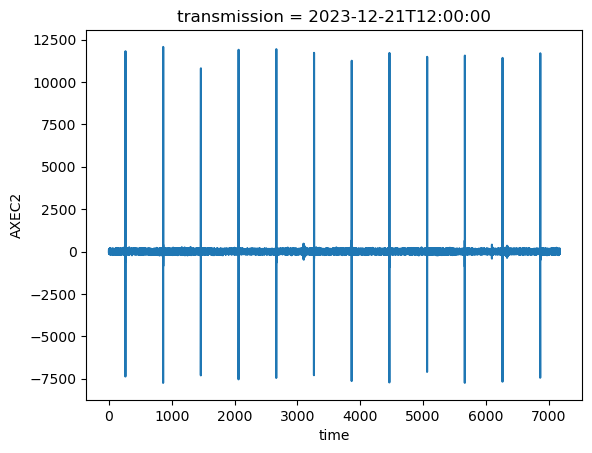

In [72]:
ds['AXEC2'].plot()